# Train VAE model

This notebook will first try to train the current VAE model before modifying the loss function to work with count data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
from ponyo import utils, train_vae_modules

Using TensorFlow backend.


In [2]:
# Set seeds to get reproducible VAE trained models
train_vae_modules.set_all_seeds()

In [3]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Read in config variables
config_filename = os.path.abspath(
    os.path.join(base_dir, "test_vae_training", "config_current_vae.tsv")
)

params = utils.read_config(config_filename)

dataset_name = params["dataset_name"]

normalized_compendium_filename = params["normalized_compendium_filename"]

In [4]:
# Create VAE directories if needed
output_dirs = [
    os.path.join(base_dir, dataset_name, "models"),
    os.path.join(base_dir, dataset_name, "logs"),
]

NN_architecture = params["NN_architecture"]

# Check if NN architecture directory exist otherwise create
for each_dir in output_dirs:
    sub_dir = os.path.join(each_dir, NN_architecture)
    os.makedirs(sub_dir, exist_ok=True)

input dataset contains 11857 samples and 1232 genes
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=() dtype=float32> beta
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/alexandra/anaconda3/envs/microbe/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output custom_variational_layer_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_1.
  'be expecting any data to be passed to {0}.'.format(name))



Train on 8893 samples, validate on 2964 samples
Epoch 1/100
8893/8893 [==============================] - 62s 7ms/step - loss: -2015050653490.9775 - val_loss: -17467370396653266944.0000
Epoch 2/100
8893/8893 [==============================] - 61s 7ms/step - loss: -27152581734426.2500 - val_loss: -1395458230301252352.0000
Epoch 3/100
8893/8893 [==============================] - 61s 7ms/step - loss: -99868955778706.2812 - val_loss: -256634244838233604096.0000
Epoch 4/100
8893/8893 [==============================] - 62s 7ms/step - loss: -229608657059980.0312 - val_loss: -23941654673538326462464.0000
Epoch 5/100
8893/8893 [==============================] - 61s 7ms/step - loss: -428116427178584.6250 - val_loss: -8162257817219704553472.0000
Epoch 6/100
8893/8893 [==============================] - 61s 7ms/step - loss: -693068958186784.8750 - val_loss: -177926356160090351702376448.0000
Epoch 7/100
8893/8893 [==============================] - 57s 6ms/step - loss: -1041629769073572.1250 - val_lo

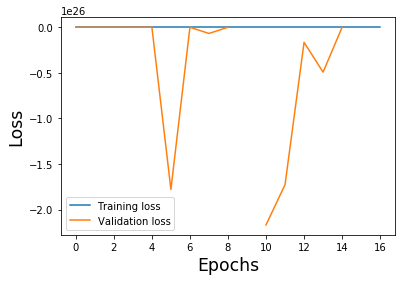

In [5]:
# Train VAE on new compendium data
train_vae_modules.train_vae(config_filename, normalized_compendium_filename)

In [6]:
# Plot training and validation loss separately
stat_logs_filename = "logs/NN_2500_30/tybalt_2layer_30latent_stats.tsv"

stats = pd.read_csv(stat_logs_filename, sep="\t", index_col=None, header=0)

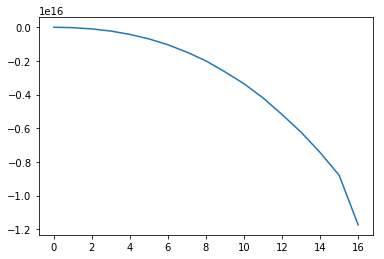

In [7]:
plt.plot(stats["loss"])

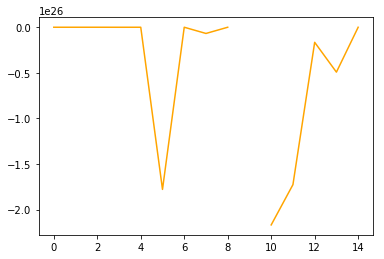

In [8]:
plt.plot(stats["val_loss"], color="orange")